In [ ]:
### First collect the dataset from the internet (AAPL Stock dataset). 
##  preprocess the data -- Train and Test the data.
##  Create the staked LSTM Model & Predict the test data and plot output.
### Predict the future price price of next 30days and plot the output.

In [30]:
import os

In [31]:
import pandas_datareader as pdr

In [32]:
df = pdr.get_data_tiingo('AAPL', api_key=('063dc5d7cc04e188fc1e1f2d606ac9c9a4a6eb8c'))

In [33]:
df.to_csv('AAPL.csv')

In [34]:
import pandas as pd

In [35]:
df=pd.read_csv('AAPL.csv')

In [36]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-01-03 00:00:00+00:00,116.15,116.3300,114.76,115.80,28781865,27.329189,27.371541,27.002132,27.246836,115127460,0.0,1.0
1,AAPL,2017-01-04 00:00:00+00:00,116.02,116.5100,115.75,115.85,21118116,27.298601,27.413894,27.235072,27.258601,84472464,0.0,1.0
2,AAPL,2017-01-05 00:00:00+00:00,116.61,116.8642,115.81,115.92,22193587,27.437423,27.497234,27.249189,27.275071,88774348,0.0,1.0
3,AAPL,2017-01-06 00:00:00+00:00,117.91,118.1600,116.47,116.78,31751900,27.743303,27.802126,27.404482,27.477423,127007600,0.0,1.0
4,AAPL,2017-01-09 00:00:00+00:00,118.99,119.4300,117.94,117.95,33561948,27.997418,28.100947,27.750362,27.752715,134247792,0.0,1.0


In [37]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2021-12-27 00:00:00+00:00,180.33,180.42,177.07,177.085,74919582,180.33,180.42,177.07,177.085,74919582,0.0,1.0
1255,AAPL,2021-12-28 00:00:00+00:00,179.29,181.33,178.53,180.160,79144339,179.29,181.33,178.53,180.160,79144339,0.0,1.0
1256,AAPL,2021-12-29 00:00:00+00:00,179.38,180.63,178.14,179.330,62348931,179.38,180.63,178.14,179.330,62348931,0.0,1.0
1257,AAPL,2021-12-30 00:00:00+00:00,178.20,180.57,178.09,179.470,59773014,178.20,180.57,178.09,179.470,59773014,0.0,1.0
1258,AAPL,2021-12-31 00:00:00+00:00,177.57,179.23,177.26,178.085,61661433,177.57,179.23,177.26,178.085,61661433,0.0,1.0


In [39]:
df1=df.reset_index()['close']

In [40]:
df1

0       116.15
1       116.02
2       116.61
3       117.91
4       118.99
         ...  
1254    180.33
1255    179.29
1256    179.38
1257    178.20
1258    177.57
Name: close, Length: 1259, dtype: float64

In [41]:
df1.shape

(1259,)

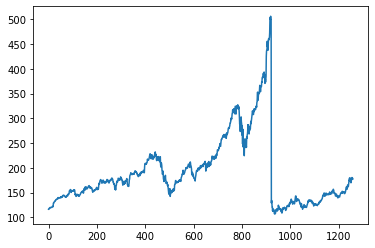

In [42]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [43]:
### LSTM is a sensitive to the scale of the data. So i applied the minmax scaler.

In [44]:
import numpy as np

In [45]:
df1

0       116.15
1       116.02
2       116.61
3       117.91
4       118.99
         ...  
1254    180.33
1255    179.29
1256    179.38
1257    178.20
1258    177.57
Name: close, Length: 1259, dtype: float64

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [49]:
df1.shape

(1259, 1)

In [50]:
df1

array([[0.02331872],
       [0.02299311],
       [0.02447088],
       ...,
       [0.18169067],
       [0.17873513],
       [0.17715717]])

In [51]:
print(df1)

[[0.02331872]
 [0.02299311]
 [0.02447088]
 ...
 [0.18169067]
 [0.17873513]
 [0.17715717]]


In [ ]:
## split the dataset for train and test

In [53]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [54]:
training_size,test_size

(818, 441)

In [57]:
len(train_data), len(test_data)

(818, 441)

In [58]:
train_data

array([[0.02331872],
       [0.02299311],
       [0.02447088],
       [0.02772699],
       [0.03043206],
       [0.03073262],
       [0.03233563],
       [0.03108328],
       [0.03055729],
       [0.0329618 ],
       [0.03293676],
       [0.03241077],
       [0.0329618 ],
       [0.03316218],
       [0.03288666],
       [0.03767063],
       [0.03782091],
       [0.03784596],
       [0.03704446],
       [0.03634314],
       [0.0548779 ],
       [0.05432686],
       [0.05570445],
       [0.05873513],
       [0.06184095],
       [0.06311835],
       [0.06407013],
       [0.06331872],
       [0.06624922],
       [0.07058234],
       [0.07180964],
       [0.07139637],
       [0.07233563],
       [0.07479023],
       [0.07581716],
       [0.07436443],
       [0.07469004],
       [0.07536631],
       [0.07551659],
       [0.08252974],
       [0.08045085],
       [0.0825047 ],
       [0.08140263],
       [0.08185348],
       [0.08055103],
       [0.07974953],
       [0.08090169],
       [0.081

In [69]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]      ## i=0,1,2,3----------99     100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [73]:
## reshape into x=t,t+1,t+2,t+3,x=t+4
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [74]:
print(X_train)

[[0.02331872 0.02299311 0.02447088 ... 0.11762054 0.11646838 0.11779587]
 [0.02299311 0.02447088 0.02772699 ... 0.11646838 0.11779587 0.11714465]
 [0.02447088 0.02772699 0.03043206 ... 0.11779587 0.11714465 0.11729493]
 ...
 [0.37735755 0.37643081 0.37670632 ... 0.34735128 0.37971196 0.35291171]
 [0.37643081 0.37670632 0.38219161 ... 0.37971196 0.35291171 0.37061991]
 [0.37670632 0.38219161 0.38396994 ... 0.35291171 0.37061991 0.36931747]]


In [75]:
print(x_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [77]:
print(x_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [80]:
# reshape input to be [sample, time step, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [81]:
### create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [82]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 14s 478ms/step - loss: 0.0176 - val_loss: 0.0130
Epoch 2/100
12/12 [==============================] - 3s 229ms/step - loss: 0.0040 - val_loss: 0.0253
Epoch 3/100
12/12 [==============================] - 3s 213ms/step - loss: 0.0025 - val_loss: 0.0162
Epoch 4/100
12/12 [==============================] - 3s 213ms/step - loss: 0.0012 - val_loss: 0.0182
Epoch 5/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0010 - val_loss: 0.0212
Epoch 6/100
12/12 [==============================] - 3s 212ms/step - loss: 8.5745e-04 - val_loss: 0.0198
Epoch 7/100
12/12 [==============================] - 3s 215ms/step - loss: 7.9277e-04 - val_loss: 0.0196
Epoch 8/100
12/12 [==============================] - 3s 230ms/step - loss: 7.7275e-04 - val_loss: 0.0200
Epoch 9/100
12/12 [==============================] - 3s 217ms/step - loss: 7.9502e-04 - val_loss: 0.0189
Epoch 10/100
12/12 [==============================] - 3s 214ms/step - loss

12/12 [==============================] - 3s 229ms/step - loss: 3.1012e-04 - val_loss: 0.0073
Epoch 79/100
12/12 [==============================] - 3s 212ms/step - loss: 3.0388e-04 - val_loss: 0.0070
Epoch 80/100
12/12 [==============================] - 3s 239ms/step - loss: 2.8894e-04 - val_loss: 0.0068
Epoch 81/100
12/12 [==============================] - 3s 232ms/step - loss: 3.2073e-04 - val_loss: 0.0075
Epoch 82/100
12/12 [==============================] - 3s 213ms/step - loss: 3.2174e-04 - val_loss: 0.0071
Epoch 83/100
12/12 [==============================] - 3s 222ms/step - loss: 2.9329e-04 - val_loss: 0.0073
Epoch 84/100
12/12 [==============================] - 3s 237ms/step - loss: 3.1484e-04 - val_loss: 0.0066
Epoch 85/100
12/12 [==============================] - 3s 221ms/step - loss: 3.1343e-04 - val_loss: 0.0069
Epoch 86/100
12/12 [==============================] - 3s 219ms/step - loss: 2.7981e-04 - val_loss: 0.0070
Epoch 87/100
12/12 [==============================] - 3s 21

In [85]:
import tensorflow as tf

In [86]:
tf.__version__

'2.7.0'

In [89]:
### lets do the prediction and check performance
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [90]:
### transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [91]:
## Calculate the RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

201.9244450988524

In [95]:
## test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

148.25616637914786

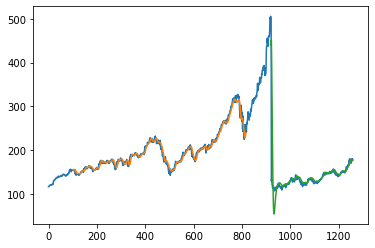

In [118]:
## plotting
## shift train prediction for plotting
look_back=100
trainpredictplot = numpy.empty_like(df1)
trainpredictplot[:, :] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict

## shift test prediction for plotting
testpredictplot = numpy.empty_like(df1)
testpredictplot[:, :] = np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

## plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

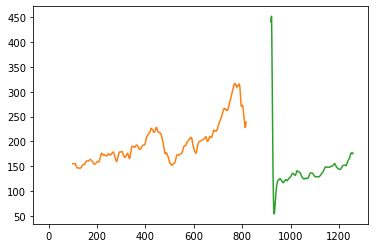

In [135]:
plt.plot(scaler.inverse_transform(df1[1258:]))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [98]:
len(test_data)

441

In [100]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [101]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [102]:
temp_input

[0.0977332498434565,
 0.10532247964934244,
 0.10584846587351276,
 0.11090795241077017,
 0.10857858484658728,
 0.09898559799624296,
 0.09983719474013769,
 0.10356919223544142,
 0.10737633061991231,
 0.10715090795241072,
 0.10399499060738887,
 0.101941139636819,
 0.1045961177207263,
 0.11591734502191609,
 0.11268628678772696,
 0.11438948027551654,
 0.11724483406386971,
 0.11887288666249218,
 0.12485911083281148,
 0.12090169067000628,
 0.11829680651221036,
 0.1055228553537883,
 0.10697557921102063,
 0.10339386349405133,
 0.10567313713212267,
 0.10507201001878513,
 0.09823418910457105,
 0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569,
 0.08783969943644326,
 0.09014402003757044,
 0.08681277395115838,
 0.08969317470256727,
 0.08090169067000619,
 0.08583594239198494,
 0.08806512210394485,
 0.09129618033813391,
 0.09031934877896053,
 0.09009392611145894,
 0.0868378209142141,
 0.08533500313087033,
 0.092473387601753

In [106]:
## prediction for the next 30 days

from numpy import array

list_output=[]
n_step=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_step, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        list_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_step,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        list_output.extend(yhat.tolist())
        i=i+1
        
print(list_output)

0 day input [0.10532248 0.10584847 0.11090795 0.10857858 0.0989856  0.09983719
 0.10356919 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612
 0.11591735 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911
 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.1638

8 day output [[0.18124573]]
9 day input [0.10399499 0.10194114 0.10459612 0.11591735 0.11268629 0.11438948
 0.11724483 0.11887289 0.12485911 0.12090169 0.11829681 0.10552286
 0.10697558 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954
 0.09164684 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397
 0.09014402 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512
 0.09129618 0.09031935 0.09009393 0.08683782 0.085335   0.09247339
 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154
 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781
 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315
 0.10289292 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408
 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967
 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464
 0.16115216 0.17092048 0.16961803 0.181866   0.17257358 0.16904195
 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311
 0.17392611 0.18407013 0

17 day output [[0.18251854]]
18 day input [0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.17789306 0.1789488  0.17963266
 0.18007262 0.1803702

26 day output [[0.18400726]]
27 day input [0.09164684 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397
 0.09014402 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512
 0.09129618 0.09031935 0.09009393 0.08683782 0.085335   0.09247339
 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154
 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781
 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315
 0.10289292 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408
 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967
 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464
 0.16115216 0.17092048 0.16961803 0.181866   0.17257358 0.16904195
 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311
 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717
 0.17789306 0.1789488  0.17963266 0.18007262 0.18037026 0.18059196
 0.18077572 0.18094093 0.1810963  0.18124573 0.18139072 0.18153247
 0.18167199 0.18181024

In [108]:
day_new=np.arange(1,101)
day_predict=np.arange(101,131)

In [109]:
import matplotlib.pyplot as plt

In [110]:
len(df1)

1259

In [111]:
df3=df1.tolist()
df3.extend(list_output)

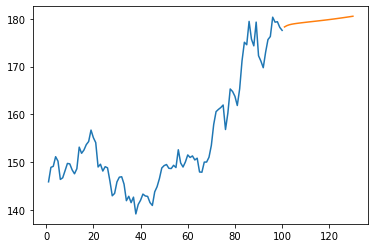

In [117]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_predict,scaler.inverse_transform(list_output))

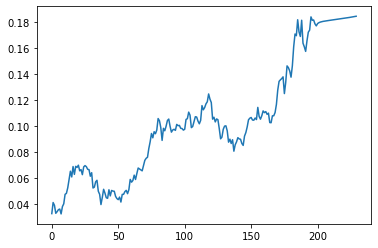

In [123]:
 plt.plot(df3[1059:])

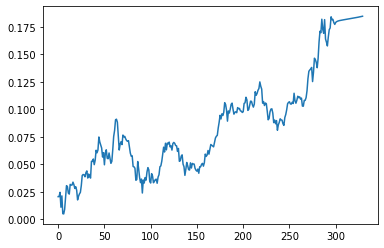

In [124]:
 plt.plot(df3[959:])

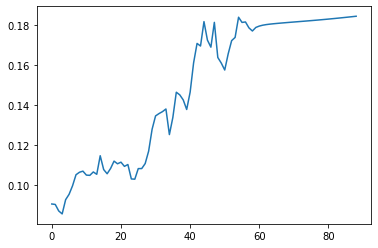

In [126]:
df3=df1.tolist()
df3.extend(list_output)
plt.plot(df3[1200:])